<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/segmentacao_sugar_scikit_image_maio_15_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado
Felzenszwalb number of segments: 3509
SLIC number of segments: 211
Quickshift number of segments: 10025


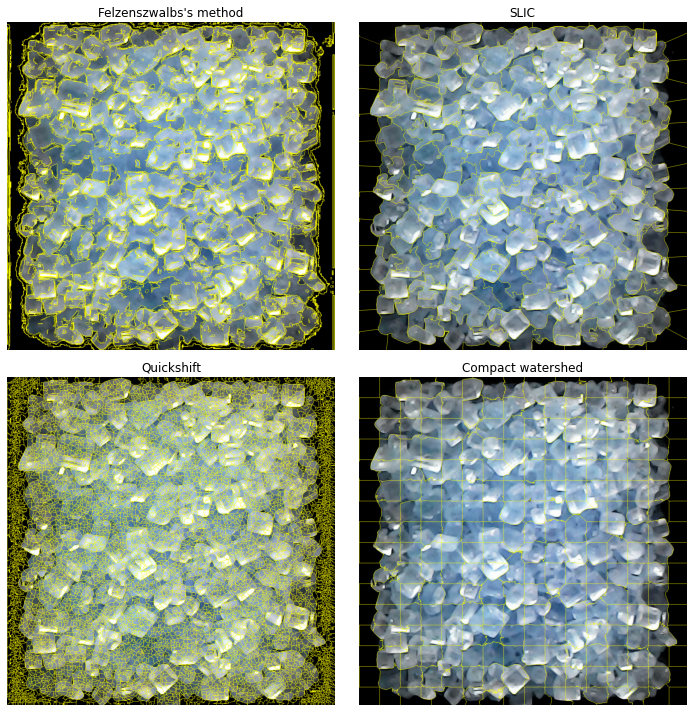

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import cv2
import zipfile

# img = img_as_float(astronaut()[::2, ::2])
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos_Grandes_3cdAmostra.zip'
Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
img=cv2.imread(Nome)

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
# segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,start_label=1)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [2]:
print(segments_watershed)

[[  1   1   1 ...  16  16  16]
 [  1   1   1 ...  16  16  16]
 [  1   1   1 ...  16  16  16]
 ...
 [241 241 241 ... 256 256 256]
 [241 241 241 ... 256 256 256]
 [241 241 241 ... 256 256 256]]


In [3]:
print(segments_watershed.shape)

(1920, 1920)
